In [1]:
%matplotlib inline

In [2]:
import sys
sys.path.insert(0,'..')
import pickle

import visualize
import datasets
import ldle
# Uncomment to reload a library
from importlib import reload 
visualize = reload(visualize)
ldle = reload(ldle)
datasets = reload(datasets)

matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline
matplotlib.get_backend() =  module://ipykernel.pylab.backend_inline


In [3]:
save_dir_root = '../data/ldle/mobiusstrip/'

In [4]:
X, labelsMat, ddX = datasets.Datasets().mobiusstrip3d()

X.shape =  (10580, 3)


# LDLE

In [5]:
ldle_obj = ldle.LDLE(X=X, eta_min=10, max_iter0=20,
                     vis = visualize.Visualize(save_dir_root),
                     vis_y_options = {'cmap0':'summer', # for the interior
                                      'cmap1':'jet', # for the tear
                                      'labels':labelsMat[:,0]})

A_k, Atilde_k: 0 points processed...
A_k, Atilde_k: 2645 points processed...
A_k, Atilde_k: 5290 points processed...
A_k, Atilde_k: 7935 points processed...
Atilde_k, Atilde_k: all points processed...

Constructing low distortion local views using LDLE...
local_param: 0 points processed...
local_param: 2645 points processed...
local_param: 5290 points processed...
local_param: 7935 points processed...
local_param: all 10580 points processed...
After iter 1, max distortion is 26.925097
After iter 2, max distortion is 20.033017
After iter 3, max distortion is 20.033017
After iter 4, max distortion is 20.033017
After iter 5, max distortion is 13.688858
After iter 6, max distortion is 13.688858
After iter 7, max distortion is 13.688858
After iter 8, max distortion is 13.688858
Max local distortion = 13.68885750081839
###############
Took 166.4 seconds to perform step 1: construct low distoriton local views
###############

Clustering to obtain low distortion intermediate views...
# non-emp

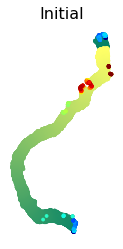

###############
Took 12.1 seconds to compute initial global embedding.
###############

Refining parameters and computing final global embedding...
Using GPA...
Iteration: 0
error: 0.002285099979617025


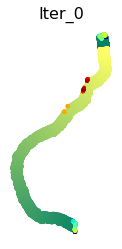

Iteration: 1
error: 0.002282223613684532
Iteration: 2
error: 0.0022562856438104214
Iteration: 3
error: 0.0022523422677627105
Iteration: 4
error: 0.0022528813479144355
Iteration: 5
error: 0.0022546539065009625


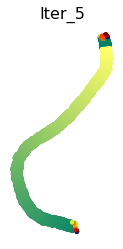

Iteration: 6
error: 0.002256632437160861
Iteration: 7
error: 0.002258598719776494
Iteration: 8
error: 0.002260985726486514
Iteration: 9
error: 0.0022629957210576453
Iteration: 10
error: 0.0022648969471042667


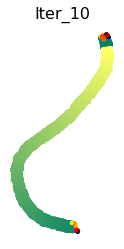

Iteration: 11
error: 0.002266689771749478
Iteration: 12
error: 0.00226863357384415
Iteration: 13
error: 0.0022703787158933164
Iteration: 14
error: 0.002272314587742772
Iteration: 15
error: 0.0022741857539870566


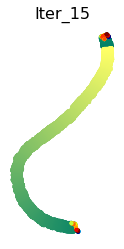

Iteration: 16
error: 0.0022757510471049136
Iteration: 17
error: 0.002277568722906646
Iteration: 18
error: 0.002279235879098549
Iteration: 19
error: 0.0022809145104549008


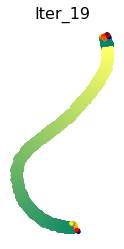

###############
Took 439.5 seconds to refine global embedding.
###############
###############
Took 453.9 seconds to perform step 3: compute global embedding.
###############


In [6]:
ldle_obj.fit()

# Optionally save for further visualizations using Visualization.ipynb

In [7]:
save_path = save_dir_root+'/ldle_obj.dat'
with open(save_path, "wb") as f:
    pickle.dump([X, labelsMat, ldle_obj], f)

# LTSA

In [8]:
from sklearn.manifold import LocallyLinearEmbedding
import visualize
vis = visualize.Visualize(save_dir_root)

In [9]:
ltsa_obj = LocallyLinearEmbedding(method='ltsa', n_neighbors=25, n_components=2, n_jobs=-1, random_state=42)

In [10]:
y_ltsa = ltsa_obj.fit_transform(X)

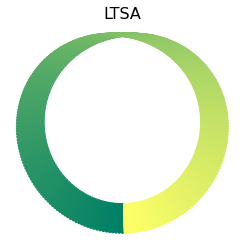

In [11]:
vis.global_embedding(y_ltsa, labelsMat[:,0], 'summer', title='LTSA')

# UMAP

In [12]:
from umap import UMAP
import visualize
vis = visualize.Visualize(save_dir_root)

In [13]:
umap_obj = UMAP(n_neighbors=200, min_dist=0.5, n_components=2,
                random_state=42, n_epochs=500, metric='euclidean')

In [14]:
y_umap = umap_obj.fit_transform(X)

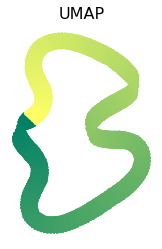

In [15]:
vis.global_embedding(y_umap, labelsMat[:,0], 'summer', title='UMAP')

# t-SNE

In [16]:
from sklearn.manifold import TSNE
import visualize
vis = visualize.Visualize(save_dir_root)

In [17]:
tsne_obj = TSNE(perplexity=50, early_exaggeration=6, n_components=2,
                metric='euclidean', random_state=42, n_iter=1000,
                n_jobs=-1, init='random')

In [18]:
y_tsne = tsne_obj.fit_transform(X)

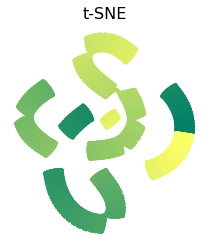

In [19]:
vis.global_embedding(y_tsne, labelsMat[:,0], 'summer', title='t-SNE')